<Axes: ylabel='Count'>

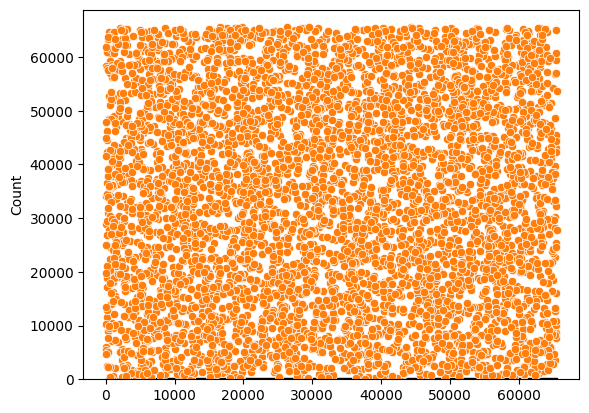

In [90]:
import numpy as np
import seaborn as sns
from icecream import ic
import scipy.stats as stats

class LCG():
    def __init__(self, seed, a=5, c=1, M=16):
        self.seed = seed
        self.a = a
        self.c = c
        self.M = M
    def generate_numbers(self, n):
        x0 = self.seed
        out = list()
        for _ in range(n):
            x0 = (self.a * x0 + self.c) % self.M
            out.append(x0)
        return np.array(out)
    

RPG = LCG(8, a=129, c=5, M=65536)
random_numbers = RPG.generate_numbers(5_000)
RPG = LCG(4, a=129, c=100, M=65536)
random_numbers2 = RPG.generate_numbers(5_000)
sns.histplot(random_numbers, bins=20)
sns.scatterplot(x = random_numbers, y = random_numbers2)

##### Chi squared


ic| T: 0.5800000000000001
ic| len(bins_ideal): 10
ic| len(bins): 10


ic| 1 - stats.chi2.cdf(x = T, df = df): 0.9999425469806461
ic| 1499271428.py:34 in <module> at 15:31:34.166
ic| bins: array([ 986, 1014, 1003, 1003,  997, 1002,  989, 1004,  998, 1004])
ic| bins_ideal: array([1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000.,
                       1000.])


<Axes: ylabel='Count'>

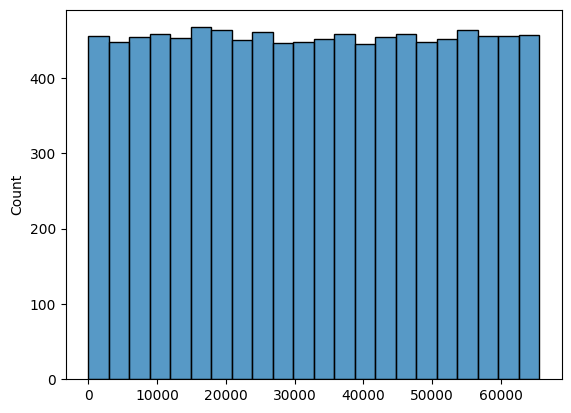

In [216]:
M = 65536
# M = 20
RPG = LCG(8, a=129, c=26401, M=M)
n = 10_000
random_numbers = RPG.generate_numbers(n)

(bins, binby) = np.histogram(random_numbers)

# Expected numbers
# bins_ideal = np.ones(M) * n/M
# (bins_ideal, binby) = np.histogram(bins_ideal, binby)
bins_ideal = np.ones(len(bins)) * (n/len(bins))

# Normalizing
# bins = bins/n
# bins_ideal = bins_ideal/n

# Calculate test-statistic
sum = 0
for observed, expected in zip(bins, bins_ideal):
    sum += (observed - expected)**2 /  \
        expected
T = sum
ic(T)
ic(len(bins_ideal))
ic(len(bins))


# Testing
m = 0
df = len(bins) - 1 - m 
ic(1 - stats.chi2.cdf(x = T, df = df))

ic(bins)
ic(bins_ideal)
# sns.scatterplot(x=bins, y=bins_ideal)
random_numbers
sns.histplot(random_numbers)

##### Kolmogorov-Smirnow

<Axes: >

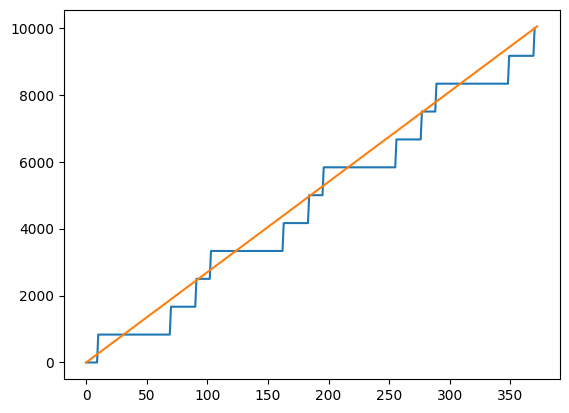

In [287]:
M = 372 # TODO set dist to the same througout 
RPG = LCG(8, a=129, c=26401, M=M)
n = 10_000
random_numbers = RPG.generate_numbers(n)

# Make n/m of each from 1 to M  
arr = []
for i in range(1, M+1):
    to_add = [i for _ in range(round(n/M))]
    arr.extend(to_add)
ideal = np.array(arr)

def Kolomogorov_S(random_numbers):
    values = []
    xvals = []
    ma = int(max((random_numbers)))+1
    for x in range(ma):
        values.append(len(random_numbers[random_numbers <= x]))
        xvals.append(x)
    return xvals, values

#print(ideal)
xvals, values = Kolomogorov_S(random_numbers)
xvalsideal, valuesideal = Kolomogorov_S(ideal)
sns.lineplot(x=xvals, y=values)
sns.lineplot(x=xvalsideal, y=valuesideal)


In [302]:
# from scipy.special import kolmogorov
# See https://arize.com/blog-course/kolmogorov-smirnov-test/
# get max diff # Remove a few since rounding makes it really hard else to create
largest = max(np.abs(random_numbers - ideal[:-44]))
ic(largest)
# kolmogrov(largest) # not implemented


ic| largest: 369


NameError: name 'kolmogrov' is not defined